# **Arcílio's Bakery**

## **Conhecendo o desafio**

Eu faço parte da empresa de consultoria MOZ_Data, que se especializa em criar soluções baseadas em dados para diversas empresas.

Recentemente, recebemos um novo cliente, o Senhor Arcílio.

O Senhor Arcílio é dono de uma padaria que opera com uma abordagem bastante tecnológica, oferecendo uma ampla variedade de produtos e até mesmo um site de vendas online. No entanto, ele notou que suas vendas estavam estagnadas. Diante disso, ele nos procurou para trabalhar com os dados que estão armazenados em seu sistema, buscando formas de agregar mais valor ao seu negócio.

## O que iremos fazer?

 
  * Regras de Associação
    
   É um método conhecido como análise de associação, que busca identificar relacionamentos desconhecidos em grandes conjuntos de dados


## **Entendendo os dados**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dados-padaria.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [4]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


## **Análise Exploratória dos dados**

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_EDA = pd.read_csv('dados-padaria.csv')

In [7]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [33]:
df_EDA['DateTime'] = pd.to_datetime(df_EDA['DateTime']) # alterando o formato para poder fazer analises ao longo do tempo
df_EDA['Date_hour'] = df_EDA['DateTime'].dt.hour        # criando a variável hora para cada transação
df_EDA['Date_month'] = df_EDA['DateTime'].dt.month
df_EDA.head(3)

,TransactionNo,Items,DateTime,Daypart,DayType,Date_hour,Date_month
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,9,10
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,10,10
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,10,10


### **Analisando a demanda por horário**

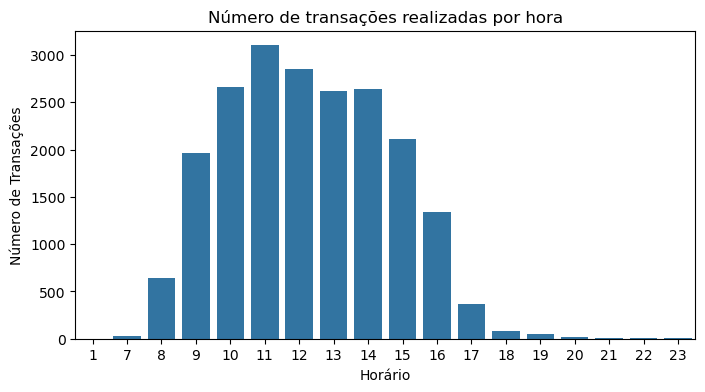

In [9]:
df_EDA_por_hora = df_EDA.groupby('Date_hour')['TransactionNo'].count().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=df_EDA_por_hora, x='Date_hour', y='TransactionNo')
plt.title('Número de transações realizadas por hora')
plt.xlabel('Horário')
plt.ylabel('Número de Transações')
plt.show()

Analizando o gráfico podemos notar que o volume de transações por hora **está concentrado entre as 9-16 horas**, tendo o seu ponto mais alto as **11 horas** nesta padaria, o que pode ser por varios motivos como:

**Consumo de Café da Manhã e Almoço:** As pessoas costumam comprar pão e outros itens para o café da manhã e o almoço, o que leva a um aumento nas vendas nesse período.

**Movimento de Funcionários:** O horário comercial, onde há um maior fluxo de trabalhadores, geralmente coincide com esse período. Funcionários em horário de almoço podem comprar itens para levar.

**Estudantes:** Durante o intervalo escolar, estudantes podem frequentar a padaria para lanchar ou comprar produtos.


### **Analisando a demanda por turno**

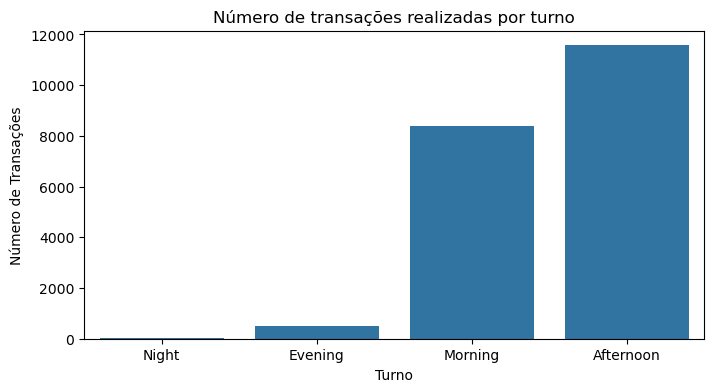

In [27]:
df_EDA_por_turno = df_EDA.groupby('Daypart')['TransactionNo'].count().reset_index()
df_EDA_por_turno = df_EDA_por_turno.sort_values(ascending= True,by= ['TransactionNo'])

plt.figure(figsize=(8,4))
sns.barplot(data=df_EDA_por_turno, x='Daypart', y='TransactionNo')
plt.title('Número de transações realizadas por turno')
plt.xlabel('Turno')
plt.ylabel('Número de Transações')
plt.show()

### **Analisando a demanda por dia da semana**

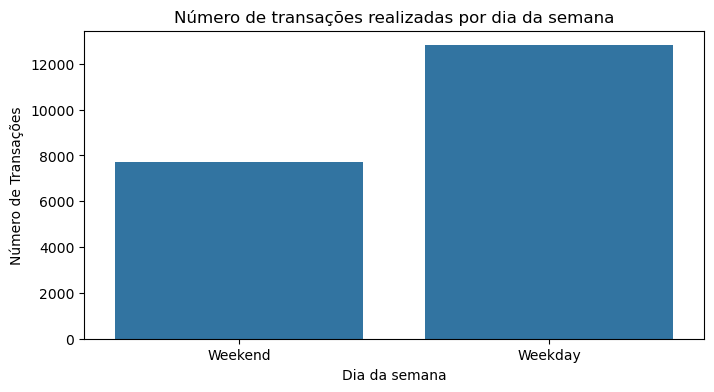

In [32]:
df_EDA_por_dia_da_semana = df_EDA.groupby('DayType')['TransactionNo'].count().reset_index()
df_EDA_por_dia_da_semana = df_EDA_por_dia_da_semana.sort_values(ascending= True,by= ['TransactionNo'])

plt.figure(figsize=(8,4))
sns.barplot(data=df_EDA_por_dia_da_semana, x='DayType', y='TransactionNo')
plt.title('Número de transações realizadas por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Número de Transações')
plt.show()

* É possivel notal que o fluxo de transações no meio de semana tende a ser significativamente maior do que no final de semana, o que pode ser causado por:

**Rotina de Trabalho:** Durante a semana, as pessoas estão mais ativas, saindo para trabalhar, o que gera maior fluxo de clientes na padaria, especialmente para comprar café da manhã, lanches ou itens para o almoço.

**Pico de Demanda por Café da Manhã:** Muitas pessoas compram pão e outros produtos de padaria no início do dia antes de ir para o trabalho ou escola, especialmente de segunda a sexta-feira.

**Compras para o Escritório:** Empresas ou escritórios podem fazer compras regulares de produtos de padaria, como café e lanches, para seus funcionários durante a semana.

**Menor Tempo Livre aos Finais de Semana:** Durante os finais de semana, as pessoas tendem a fazer refeições mais completas em casa ou em restaurantes, o que pode reduzir a necessidade de ir à padaria.

## Preparando os dados para a associação

In [11]:
# tratamento dos dados
# lista de transasoes

transacao = []

for item in df['TransactionNo'].unique():     # valores unicos para cada transação
  lista = list(set(df[df['TransactionNo']==item]['Items']))  # Criar uma lista para armazenar os valores unicos de cada transação
  transacao.append(lista)

In [12]:
transacao[0:5] # vendo as 5 primeiras transacoes da padaria

[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread']]

## Regras de associação 


A aplicação das Regras de Associação é de grande importância, principalmente para identificar os comportamentos de compra dos clientes. Por exemplo, podemos descobrir se há uma tendência maior entre os frequentadores da padaria do Senhor Arcílio em comprar mais café. Será que o pessoal que visita a padaria tem preferência por café?

Além disso, podemos identificar outros tipos de comportamento, como se os clientes preferem produtos doces ou salgados. Com essas informações, posso começar a direcionar melhor os produtos dentro do negócio do Senhor Arcílio. Outra grande vantagem de aplicar as regras de associação é que elas nos permitem apoiar uma variedade de decisões estratégicas relacionadas ao negócio.

Com essas informações, posso, por exemplo, reorganizar a disposição dos itens na padaria do Senhor Arcílio. Talvez certos produtos devam ser colocados próximos uns dos outros. Se descobrimos que "café vende mais com pão", faz sentido deixar esses itens próximos, para que os clientes os vejam juntos e comprem ambos. Por outro lado, se percebemos que "pão e chá não vendem tão bem juntos", podemos afastar esses itens na loja.

### Geração dos conjuntos frequentes

Nós entendemos o que são as regras de associação. Dentro dessas regras, temos formas de otimizar, por exemplo, a geração dos itens frequentes.

Quando estamos a trabalhar com a geração dos conjuntos frequentes, todos os conjuntos possíveis de itens são gerados. Aí temos um pequeno problema: o aumento da complexidade computacional.

Imagine um grande conjunto de dados com 100 itens. Todos os conjuntos possíveis entre esses 100 itens são gerados, o que pode complicar um pouco. Isso torna a geração das regras mais lenta e pesada. Portanto, existe uma forma de otimizar essa geração dos conjuntos de itens frequentes.

**Teorema do Principio apriori**   se um conjunto de itens é frequente, todos os seus subconjuntos também são.

Tabela de Frequência dos Itens

| Item        | Frequência |
|-------------|------------|
| Pão         | 3          |
| Café        | 4          |
| Bolo        | 4          |
| Leite       | 4          |
| Rosquinha   | 2          |
| Ovos        | 1          |

Análise de Conjuntos

Conjuntos de 1-item (Frequentes):
- Pão
- Café
- Bolo
- Leite

Conjuntos de 1-item (Infrequentes):
- Rosquinha
- Ovos (descartados)

Conjuntos de 2-itens e suas frequências:

| Conjunto            | Frequência |
|---------------------|------------|
| {Pão, Bolo}         | 2          |
| {Pão, Café}         | 3          |
| {Pão, Leite}        | 2          |
| {Bolo, Café}        | 3          |
| {Bolo, Leite}       | 3          |
| {Leite, Café}       | 4          |

Conjuntos de 2-itens (Frequentes):
- {Pão, Café}
- {Bolo, Café}
- {Bolo, Leite}
- {Leite, Café}

Conjuntos de 2-itens (Infrequentes):
- {Pão, Bolo}
- {Pão, Leite} (descartados)

Conjuntos de 3-itens:
- {Café, Bolo, Leite} (Frequência: 2, descartado)

Resumo

O algoritmo Apriori permite identificar conjuntos de itens frequentes com base em suas transações. Após definir um suporte mínimo de 3, foram considerados os itens e seus conjuntos. A rosquinha e os ovos foram descartados por serem infrequentes.

Os conjuntos de 2-itens foram analisados, resultando em alguns conjuntos sendo considerados frequentes, enquanto outros foram descartados. No final, o algoritmo reduz significativamente o número de conjuntos a serem explorados, tornando o processo mais eficiente.
rem explorados, tornando o processo mais eficiente.


### Aplicando a regra de associação

* É necessário converter as listas de itens em um dataframe com as transações que o modelo de machine learning possa processar.


In [13]:
from mlxtend.preprocessing import TransactionEncoder

In [14]:
te = TransactionEncoder()  # instansciar a função dentro da variável te

transacao_te = te.fit(transacao).transform(transacao) # variavel que vai armazenar os dados transformados

transacao_te

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

**Cada linha terá False para os items não presentes na transação e True para os items presentes**

Depois de realizar a transformação precisamos modificar a nossa variável transacao_te de array para Dataframe, para poder usar a regra de associação

In [15]:
transacao_transformado = pd.DataFrame(transacao_te, columns= te.columns_)  # Transformando em dataframe
transacao_transformado

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


* **Algoritmo apriori**


In [16]:
from mlxtend.frequent_patterns import apriori

In [17]:
items_frequentes_apriori = apriori(transacao_transformado, use_colnames=True, min_support=0.02)  # Criar conjunto de dados frequentes
items_frequentes_apriori.sort_values(['support'], ascending = False)                             # Ordenar dados do maior para o menor

,support,itemsets
4,0.478394,(Coffee)
1,0.327205,(Bread)
16,0.142631,(Tea)
3,0.103856,(Cake)
20,0.090016,"(Coffee, Bread)"
11,0.086107,(Pastry)
12,0.071844,(Sandwich)
9,0.061807,(Medialuna)
7,0.058320,(Hot chocolate)
23,0.054728,"(Coffee, Cake)"


* **Podemos ver que o café, pão e chá são os items que mais se destacam em vendas na padaria do senhor Arcílio** 

In [18]:
from mlxtend.frequent_patterns import association_rules

In [19]:
regras_apriori = association_rules(items_frequentes_apriori, metric='confidence', min_threshold=0.5) # Variável que armazena regras de associações de acordo com os items frequentes com um minimo de 50% 
regras_apriori                                                                                       # de confiança para ser considerado aceite

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
1,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
2,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
3,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
4,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
5,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
6,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006


* **É possivel notar que a regra de tosta + café tem um nivel de confiança de 70%, o que pode nos levar a adoptar estratégias para pontencializar ainda mais o consumo combinado desses dois items** 